# -------------------------------------------------------------------------------------------------------------

## This script makes a fancy Period_Mass Plot regarding detection methods of exoplanets using pandas.

### Fernando Gutiérrez-Canales
### January, 2021 (during the awful covid19)

# -------------------------------------------------------------------------------------------------------------

In [1]:
#Load libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#We create a dataframe loading our plots. The data of all the confirmed exoplanets can be found in here
# https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=planets
# You can download a csv file with the columns that you want.
df = pd. read_csv("planets_2021.02.07.csv")
df

,pl_discmethod,Period[days],Mass[Jupiter Mass]
0,Radial Velocity,326.030000,19.4000
1,Radial Velocity,516.219970,14.7400
2,Radial Velocity,185.840000,4.8000
3,Radial Velocity,1773.400020,4.6600
4,Radial Velocity,798.500000,1.7800
...,...,...,...
4336,Radial Velocity,305.500000,20.6000
4337,Radial Velocity,4.617033,0.6876
4338,Radial Velocity,241.258000,1.9810
4339,Radial Velocity,1276.460000,4.1320


In [4]:
#Now cleaning the dataframe because some of the rows doesn't have values for both period and mass. This will reduce the number of rows.
df_clean = df.dropna()
df_clean

,pl_discmethod,Period[days],Mass[Jupiter Mass]
0,Radial Velocity,326.030000,19.4000
1,Radial Velocity,516.219970,14.7400
2,Radial Velocity,185.840000,4.8000
3,Radial Velocity,1773.400020,4.6600
4,Radial Velocity,798.500000,1.7800
...,...,...,...
4336,Radial Velocity,305.500000,20.6000
4337,Radial Velocity,4.617033,0.6876
4338,Radial Velocity,241.258000,1.9810
4339,Radial Velocity,1276.460000,4.1320


In [5]:
#Now if you are interested in saving this dataframe as a new .csv file in the current directory, the next line will help
df_clean.to_csv('exoplanetas.csv', index = False) 

In [6]:
#The next line will tell you how many planets there are for each detection method in our clean data frame.
df_clean.groupby("pl_discmethod").count()

,Period[days],Mass[Jupiter Mass]
pl_discmethod,,
Astrometry,1,1
Eclipse Timing Variations,16,16
Imaging,6,6
Microlensing,8,8
Orbital Brightness Modulation,3,3
Pulsar Timing,6,6
Pulsation Timing Variations,2,2
Radial Velocity,824,824
Transit,793,793


In [7]:
#Now, we can make a dataframe for the planets detected with each method. For instance, we can create a dataframe only with the planets detected via RV.
radial = df_clean[df_clean["pl_discmethod"].str.contains("Radial Velocity")]
radial

,pl_discmethod,Period[days],Mass[Jupiter Mass]
0,Radial Velocity,326.030000,19.4000
1,Radial Velocity,516.219970,14.7400
2,Radial Velocity,185.840000,4.8000
3,Radial Velocity,1773.400020,4.6600
4,Radial Velocity,798.500000,1.7800
...,...,...,...
4336,Radial Velocity,305.500000,20.6000
4337,Radial Velocity,4.617033,0.6876
4338,Radial Velocity,241.258000,1.9810
4339,Radial Velocity,1276.460000,4.1320


In [10]:
#The same can be done with the planets detected via the transit method. Nevertheless, we won't make the dataframe explicit.
# In change, I will make a dataframe for each detection method.
transit = df_clean[df_clean["pl_discmethod"].str.contains("Transit")]

In [11]:
micro = df_clean[df_clean["pl_discmethod"].str.contains("Microlensing")]

In [12]:
imagi = df_clean[df_clean["pl_discmethod"].str.contains("Imaging")]

In [13]:
eclip = df_clean[df_clean["pl_discmethod"].str.contains("Eclipse Timing Variations")]

In [14]:
pulsa = df_clean[df_clean["pl_discmethod"].str.contains("Pulsar Timing")]

In [15]:
brigh = df_clean[df_clean["pl_discmethod"].str.contains("Orbital Brightness Modulation")]

In [16]:
tr_va = df_clean[df_clean["pl_discmethod"].str.contains("Transit Timing Variations")

SyntaxError: unexpected EOF while parsing (<ipython-input-16-80b789c40c3b>, line 1)

NameError: name 'transit' is not defined

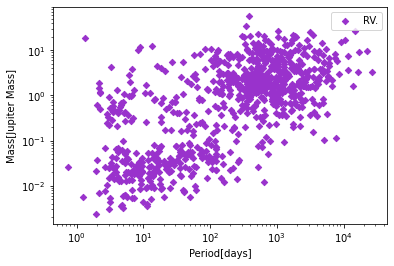

In [9]:
#Now we plot
ax = plt.gca()
radial.plot(kind='scatter',x='Period[days]',y='Mass[Jupiter Mass]', marker= "D", color='darkorchid', logx = True, logy = True, label = "RV.", ax=ax)
transit.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "o", color='limegreen', logx = True, logy = True, label="Transit.",ax=ax)
micro.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "s", color='darkturquoise', logx = True, logy = True, label="Microlensing.",ax=ax)
imagi.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "p", color='coral', logx = True, logy = True, label="Imaging.",ax=ax)
eclip.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "H", color='yellow', logx = True, logy = True, label="Eclip. Tim. Var.",ax=ax)
pulsa.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "v", color='red', logx = True, logy = True, label="Pulsar Tim.",ax=ax)
brigh.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "^", color='navy', logx = True, logy = True, label="Bright Mod.",ax=ax)
tr_va.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "<", color='dodgerblue', logx = True, logy = True, label="Trans. Tim. Var.",ax=ax)
plt.savefig('detection_methods.eps',format='eps', bbox_inches='tight')
plt.savefig('detection_methods.png', format='png', bbox_inches='tight', dpi=300)
plt.show()